In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import urllib.request
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 9, 8

data_train = pd.read_csv("./poker_t.csv", header=None,
                       names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
data_test = pd.read_csv("poker_tra_in.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
# data_train=pd.DataFrame(data_train)
'''
EXPLORE THE DATA
'''
# summary statistics including counts, mean, stdev, quartiles for the training dataset
# data_train.head(n=5)
# data_train.dtypes # data types of each variable
data_train["CLASS"]=data_train["CLASS"].astype(int)
data_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
# subset clustering variables
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

clustervar=cluster.copy()
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

clus_train = clustervar
clus_train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,-1.351374,0.801327,-1.335171,1.058113,-1.344673,1.598400,-1.340448,1.349730,-1.338435,-1.593673
1,-0.455687,1.068012,-0.443702,1.589054,-0.454300,0.797310,-0.444380,1.349730,-0.444549,-1.593673
2,0.440001,1.334698,0.447766,1.058113,0.436073,1.598400,0.451689,0.815980,0.449338,-1.593673
3,1.335688,0.801327,1.339234,1.058113,1.326445,-1.605959,1.347757,1.616605,1.343225,1.346321
4,1.335688,-1.598846,1.339234,1.589054,1.326445,1.331370,1.347757,1.082855,1.343225,0.811777
...,...,...,...,...,...,...,...,...,...,...
25005,0.440001,0.534641,-0.443702,-0.269239,1.326445,1.064340,1.347757,1.349730,-0.444549,-0.791857
25006,1.335688,-1.598846,1.339234,0.792643,0.436073,1.598400,0.451689,-0.785270,-1.338435,0.811777
25007,-0.455687,-1.598846,-0.443702,0.792643,1.326445,-0.804869,1.347757,-1.585895,1.343225,1.613593
25008,-0.455687,1.334698,1.339234,-1.065650,-1.344673,0.797310,-1.340448,1.349730,1.343225,0.544504


C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

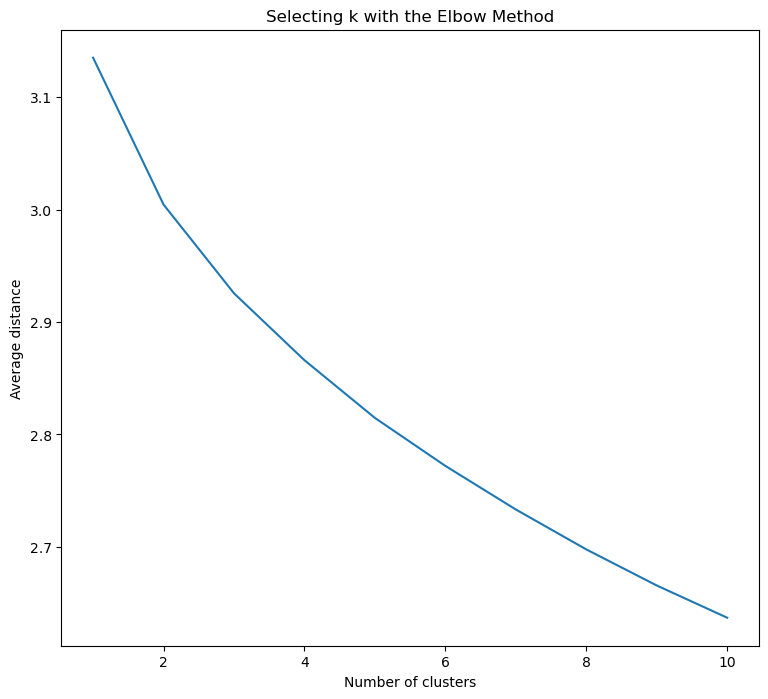

In [5]:
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])


plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 

In [28]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
ms = MeanShift()
ms.fit(clus_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(clus_train)):
    plt.plot(clus_train[i][0], clus_train[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

[[-1.20396913e-04 -7.94083963e-04 -6.26147918e-04  6.81291188e-04
   6.07864799e-04  8.68108825e-04 -4.97310399e-04 -7.62690794e-04
  -7.38626841e-04  3.11418772e-04  4.97018533e-01]]
Estimated clusters: 1


KeyError: 0

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 0 ... 0 1 0]
[1 1 1 ... 1 1 1]
[9 9 9 ... 1 1 1]
0.42379048380647744


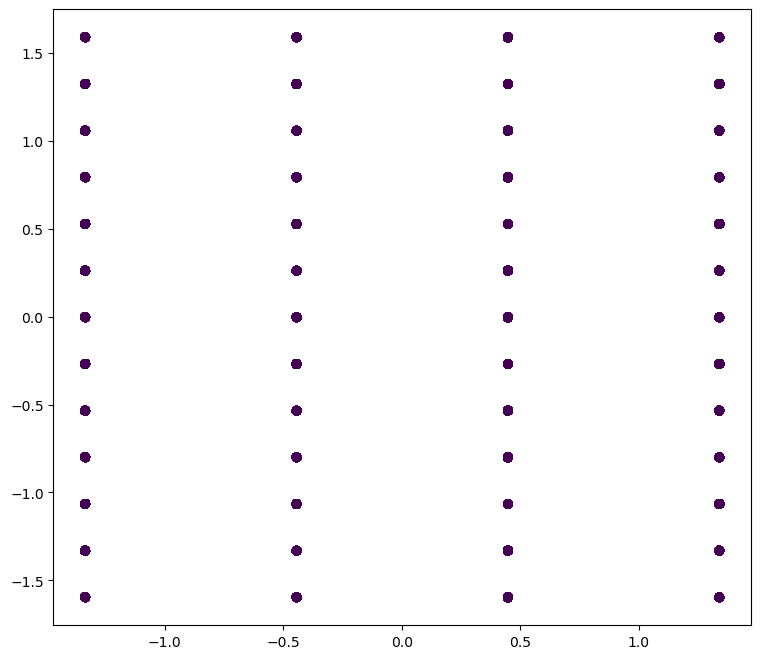

             S1        C1        S2        C2        S3        C3        S4  \
0     -1.351374  0.801327 -1.335171  1.058113 -1.344673  1.598400 -1.340448   
1     -0.455687  1.068012 -0.443702  1.589054 -0.454300  0.797310 -0.444380   
5     -1.351374 -1.332161 -1.335171 -0.800179 -1.344673 -0.537839 -1.340448   
6     -1.351374  0.534641 -1.335171  1.323584 -1.344673  0.797310 -1.340448   
7     -0.455687 -1.598846 -0.443702 -1.331120 -0.454300 -1.071899 -0.444380   
...         ...       ...       ...       ...       ...       ...       ...   
24994  1.335688  0.001269 -1.335171  0.792643 -0.454300 -0.270810 -1.340448   
24996 -0.455687  1.068012 -1.335171 -0.534709 -1.344673  0.797310  1.347757   
24997  0.440001  0.001269  0.447766  1.589054 -0.454300 -0.804869 -1.340448   
25003 -1.351374  1.334698 -0.443702  0.527173 -0.454300  1.331370  1.347757   
25008 -0.455687  1.334698  1.339234 -1.065650 -1.344673  0.797310 -1.340448   

             C4        S5        C5  cluster  
0   

In [29]:
from sklearn import metrics
import time
final_dict={}
start_time = time.time()
model3=KMeans(n_clusters=2)
model3.fit(clus_train)
pred=model3.predict(clus_train)
print(pred)
pred[pred == 0] =1
# print()
print(pred)
print(data_train["CLASS"].values)
score = metrics.accuracy_score(data_train["CLASS"].values,pred)
# print(model3.labels_)
print(score)
final_dict["Non-distributed"]=score
plt.scatter(clus_train["S2"],clus_train["C2"], c=pred)
plt.show()
# center = np.array(model3.cluster_centers_)
# print(center)
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map = clus_train
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
center = np.array(model3.cluster_centers_)
# print(center)
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6757770632368703


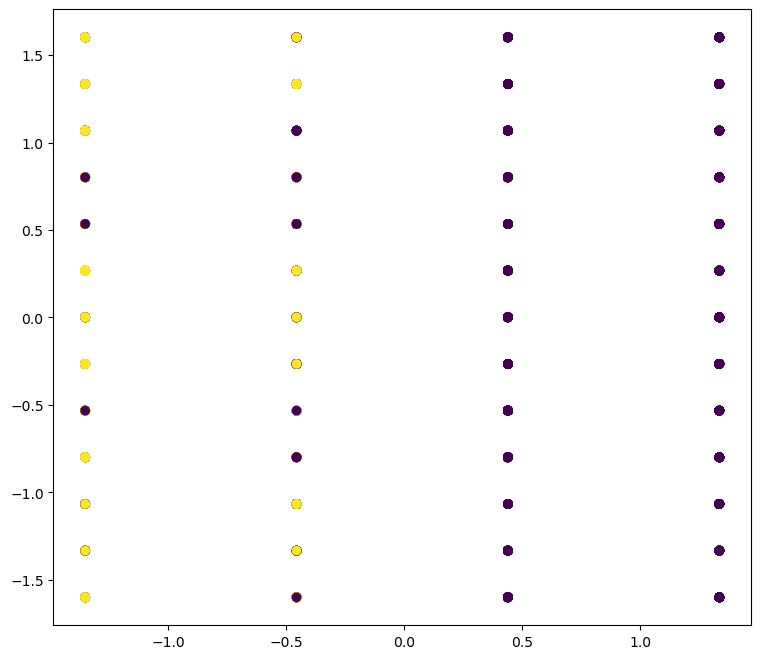

TIME 0.6822929382324219


In [30]:
## 0.7C1 + 0.3C2
import time
start_time = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6880670724704261
TIME 0.5807592868804932


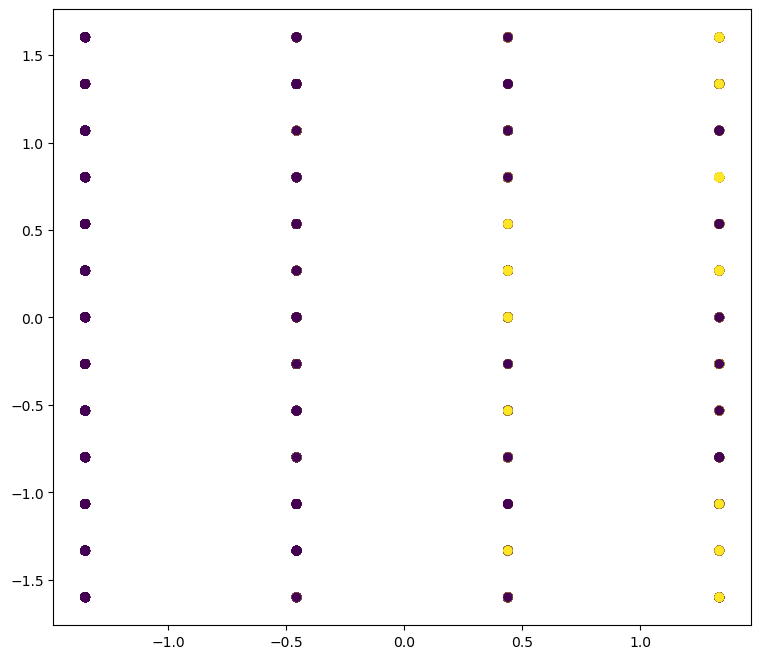

In [31]:

from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["3C1+7C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)

print("TIME",time.time() - start_time)
plt.show()

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6856407782601704


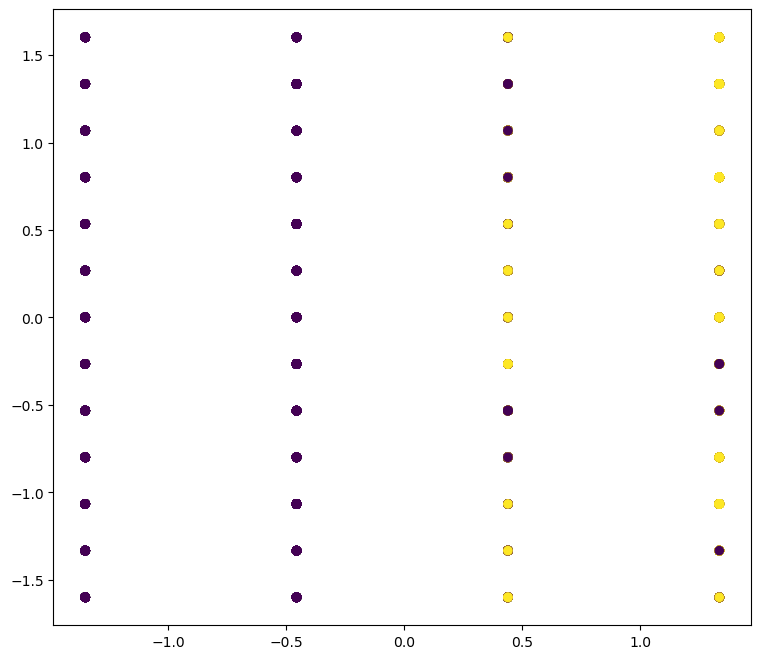

TIME 0.7222146987915039


In [32]:
## 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

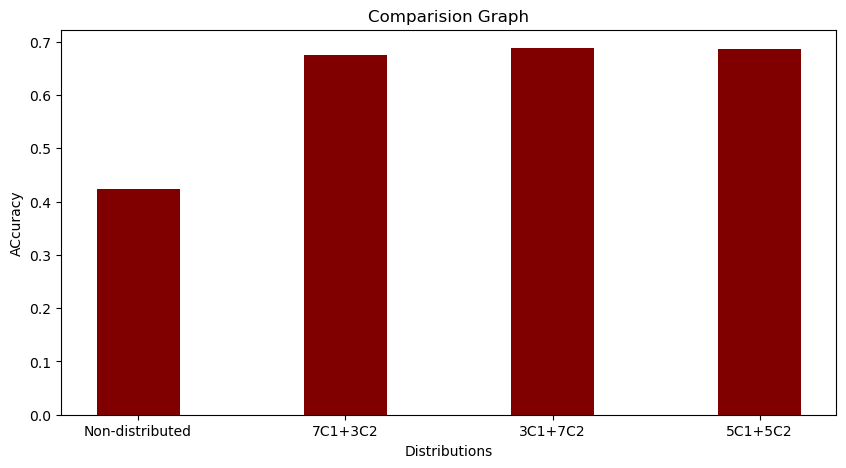

In [33]:

import numpy as np
import matplotlib.pyplot as plt
courses = list(final_dict.keys())
values = list(final_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Distributions")
plt.ylabel("ACcuracy")
plt.title("Comparision Graph")
plt.show()

Text(0.5, 1.0, 'Scatterplot of Canonical Variables for 2 Clusters')

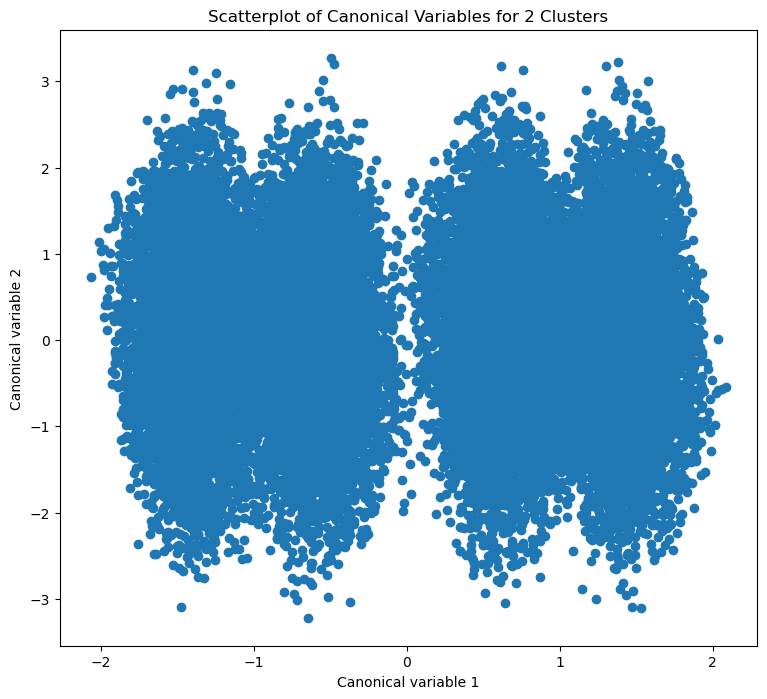

In [35]:
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(clus_train) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')

In [36]:
"""
Dr ;;
2: for each site s 2 f1; ... ; Sg do
3: Apply DML to data at site s;
4: Let Y ðsÞ
i ; i ¼ 1; 2; ... ; ns be the group centroids;
5: Let WðsÞ
i ; i ¼ 1; 2; ... ; ns be the group sizes;
6: Ys fY ðsÞ
i : i ¼
"""

from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10).fit(center)
sc.labels_

C:\Users\sumuk\anaconda3\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


array([0, 1], dtype=int64)

In [44]:
data_train = pd.read_csv("poker_t.csv")
print(data_train.head())
data_train=data_train.dropna()
without_center=data_train.drop("9",axis=1)
without_center=without_center.dropna()
print(without_center.head())
without_center.shape

   1  10  1.1  11  1.2  13  1.3  12  1.4  1.5  9
0  2  11    2  13    2  10    2  12    2    1  9
1  3  12    3  11    3  13    3  10    3    1  9
2  4  10    4  11    4   1    4  13    4   12  9
3  4   1    4  13    4  12    4  11    4   10  9
4  1   2    1   4    1   5    1   3    1    6  8
   1  10  1.1  11  1.2  13  1.3  12  1.4  1.5
0  2  11    2  13    2  10    2  12    2    1
1  3  12    3  11    3  13    3  10    3    1
2  4  10    4  11    4   1    4  13    4   12
3  4   1    4  13    4  12    4  11    4   10
4  1   2    1   4    1   5    1   3    1    6


(25009, 10)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 2 ... 1 1 2]
[9 9 9 ... 1 1 1]
0.28473749450197927


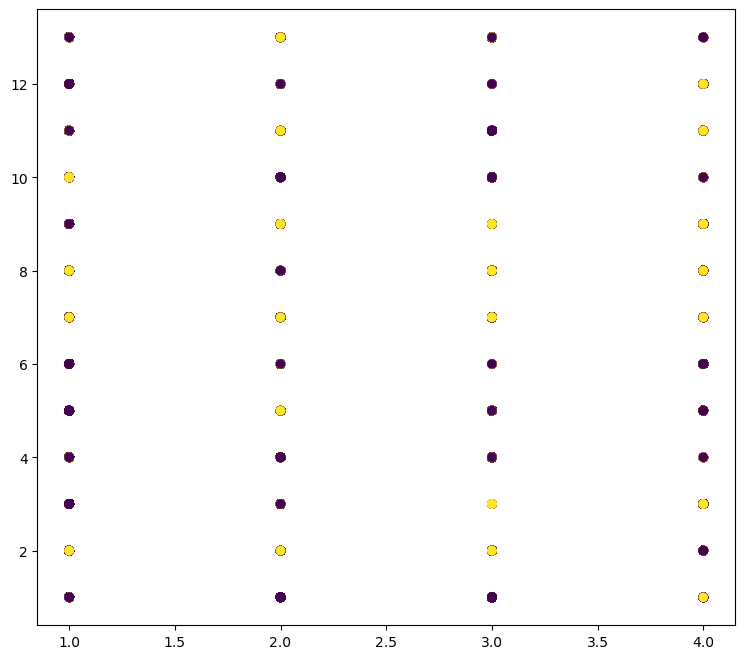

       1  10  1.1  11  1.2  13  1.3  12  1.4  1.5  cluster
3      4   1    4  13    4  12    4  11    4   10        1
4      1   2    1   4    1   5    1   3    1    6        1
6      2   1    2   2    2   3    2   4    2    5        1
7      3   5    3   6    3   9    3   7    3    8        1
9      1   1    2   1    3   9    1   5    2    3        1
...   ..  ..  ...  ..  ...  ..  ...  ..  ...  ...      ...
24981  4   1    2   1    1   3    2   6    3    1        1
24982  3   2    3   1    4  10    4   6    1    3        1
25003  3   5    3   7    4  11    3  11    3    2        1
25005  4   1    4  10    3  13    3   4    1   10        1
25006  2   1    2  10    4   4    4   1    4   13        1

[8132 rows x 11 columns]
TIME 1.9706737995147705


In [51]:
## Non-distributed
from sklearn import metrics
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
final_dict={}
start_time = time.time()
model3=KMeans(n_clusters=3)
model3.fit(without_center)
pred=model3.predict(without_center)
# pred[pred == 1] =2
pred[pred == 0] =1
# print()
print(pred)
print(data_train["9"].values)
score = metrics.accuracy_score(data_train["9"],pred)
# print(model3.labels_)
final_dict["Non-distributed"]=score
print(score)
plt.scatter(without_center["1"],without_center["12"], c=pred)
plt.show()
center = np.array(model3.cluster_centers_)
# print(center)
cluster_map = without_center
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.675


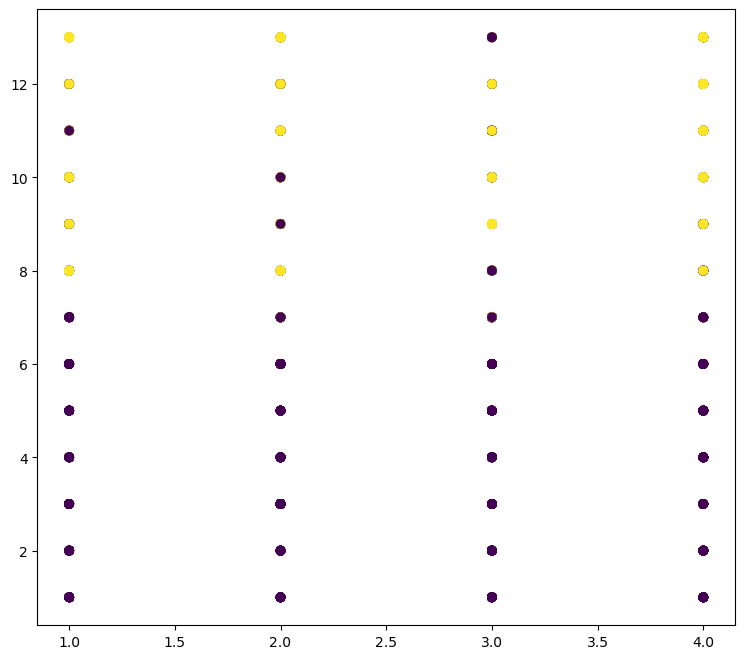

TIME 0.9850482940673828


In [52]:
## 0.7C1 + 0.3C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["1"],X_test["12"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


[2 0 2 ... 2 0 2]
0.6936588793254874


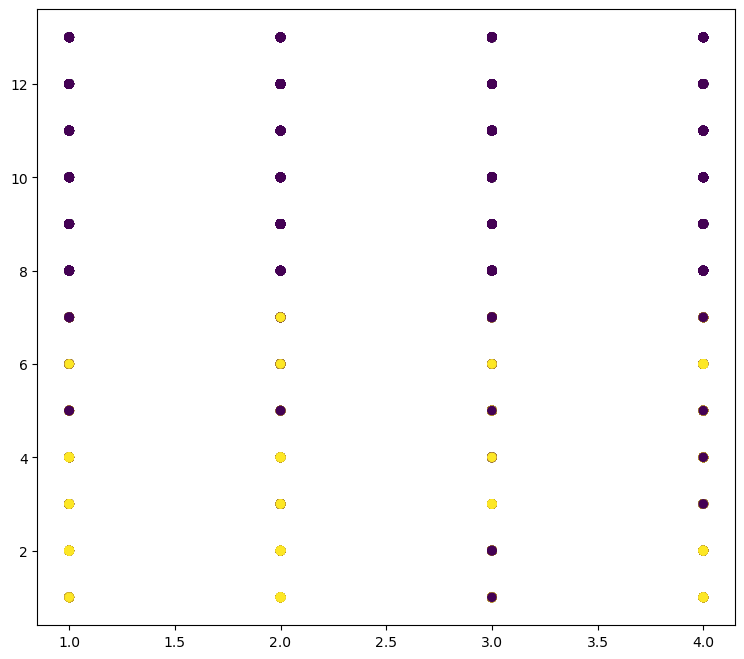

TIME 1.2045543193817139


In [53]:
# 0.3C1 + 0.7C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
print(pred)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
print(score)
final_dict["3C1+7C2"]=score
plt.scatter(X_test["1"],X_test["12"], c=pred)
plt.show()
import time
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 2 ... 1 0 2]
0.6340383669454008


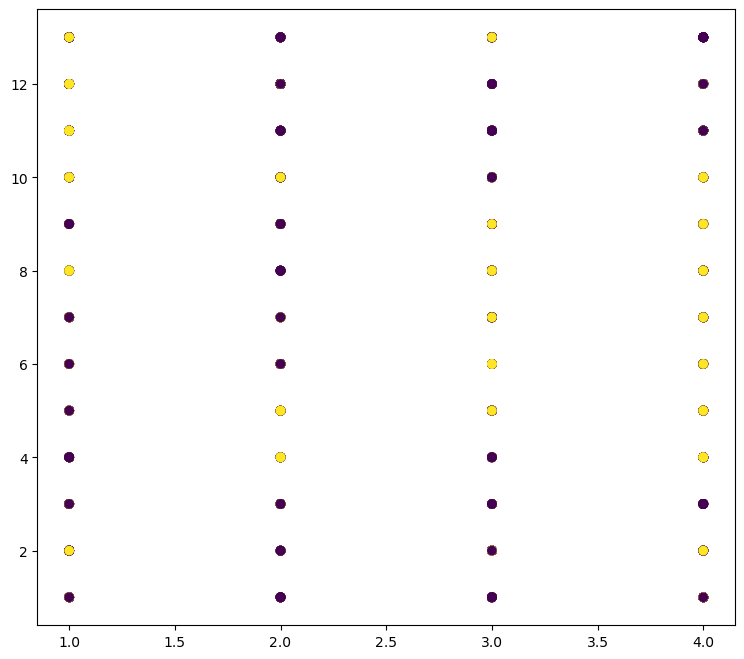

TIME 1.030517339706421


In [54]:
# 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=10)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
print(pred)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["1"],X_test["12"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

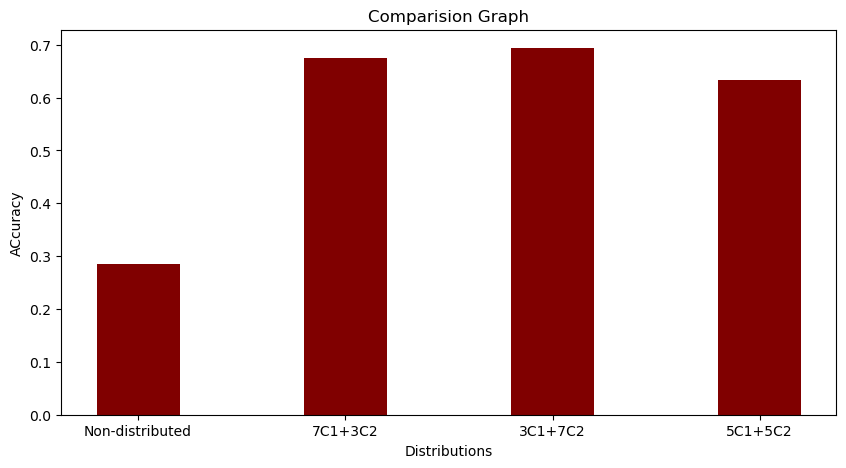

In [55]:

import numpy as np
import matplotlib.pyplot as plt
courses = list(final_dict.keys())
values = list(final_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Distributions")
plt.ylabel("ACcuracy")
plt.title("Comparision Graph")
plt.show()